In [17]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#importing dataset from sklearn
from sklearn.datasets import load_boston
boston_dataset = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


data: contains the information about the houses
target: prices of the house
feature_names: names of the features
DESCR: describes the dataset

In [4]:
#loading the above data into a pandas dataframe
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#Since the 'MEDV' column is not present above, so we have to add it
boston['MEDV'] = boston_dataset.target

In [6]:
#displaying the dataset
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
#to check for null values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Inference-There are no null values in the above dataset

Q4. Use the boston.csv dataset and determine the best 5 features to predict ‘MEDV’.

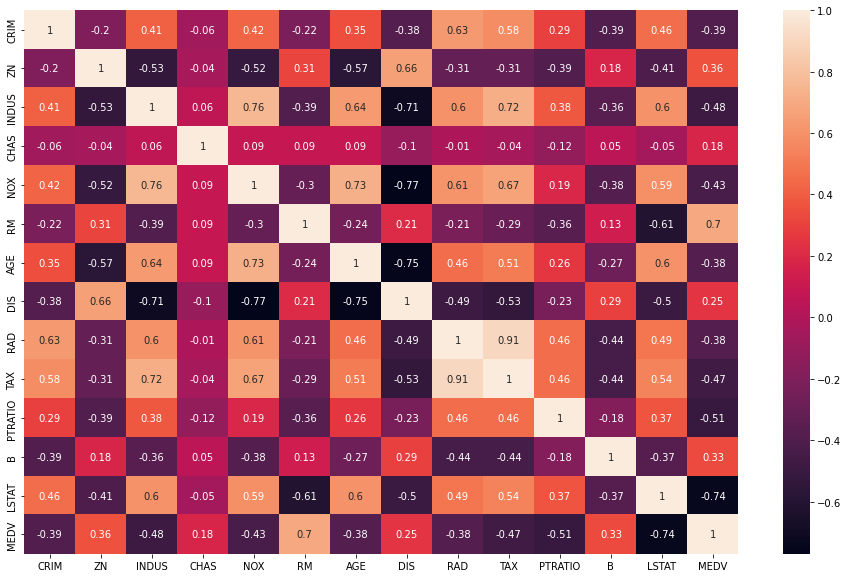

In [8]:
#to find the best 5 features for predicting the house prices we plot the correlation matrix 
plt.figure(figsize=(16,10)) #setting the size of the plot
corr_matrix = boston.corr().round(2) #using round() feature to get the result upto 2 decimal places
sns.heatmap(data=corr_matrix, annot=True)  # annot = True to print the values inside the square

Inference-
Top 5 correlated features with MEDV are:
1-LSTAT-(-0.74 : negatively correlated)
2-RM-(0.7 : positively related)
3-PTRATIO-(-0.51 : negatively correlated)
4-INDUS-(-0.48 : negatively correlated)
5-TAX-(-0.47 : negatively correlated) 

Here, INDUS and TAX are highly correlated among themselves, hence they should not be selected together for training or testing 

Additionally, we can use feature-'B' instead of 'TAX' as a predictor for 'MEDV' becasue although it is not very much correlated with 'MEDV' ,but it is also not highly correlated with other variables also.

Hence we select top 4 features i.e. LSTAT, RM ,PTRATIO AND INDUS for multiple regression analysis

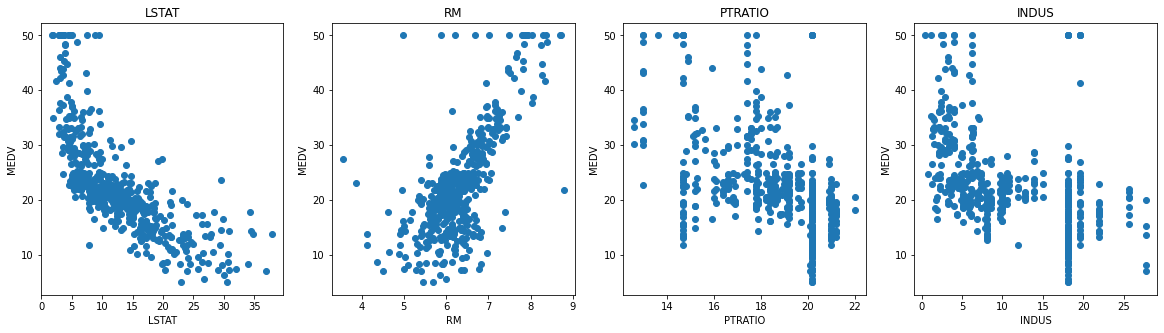

In [9]:
#Plotting scatterplots of different features with respect to 'MEDV' to observe how much scattered the data is

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','PTRATIO','INDUS']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

INFERENCE-In case of LSTAT and RM there are still few outliers and it approximately follows a linear distribution, but in case of 
PTRATIO and INDUS the data is very much scattered

In [10]:
#concatenating the best 4 features to create a dataframe 'X'
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'],boston['PTRATIO'],boston['INDUS']], 
                 columns = ['LSTAT','RM','PTRATIO','INDUS'])
Y = boston['MEDV']

In [11]:
#display X
X.head()

,LSTAT,RM,PTRATIO,INDUS
0,4.98,6.575,15.3,2.31
1,9.14,6.421,17.8,7.07
2,4.03,7.185,17.8,7.07
3,2.94,6.998,18.7,2.18
4,5.33,7.147,18.7,2.18


In [12]:
#display Y
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

In [13]:
#we use train_test_split to split the dataset for training and testing
#80%-training and 20%-testing

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5) #random_state=5 ensures hat every time
#on running the model the output remains same because there is no differnce in training and testing internally
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 4)
(102, 4)
(404,)
(102,)


Q5. Using sklearn.linear_model, find the multiple regression model for the 
boston.csv dataset using the best 4 features. (from sklearn.linear_model import 
LinearRegression) 

In [14]:
#importing LinearRegression model
from sklearn.linear_model import LinearRegression
mul_model = LinearRegression()
mul_model.fit(X_train, Y_train)

LinearRegression()

In [15]:
print('labels\n',X.columns)
print('Coefficients: \n', mul_model.coef_)
print('Intercept: \n', mul_model.intercept_)
#print('R2 for Train)', mul_model.score( X_train, Y_train ))
#print('R2 for Test (cross validation)', mul_model.score(X_test, Y_test))

labels
 Index(['LSTAT', 'RM', 'PTRATIO', 'INDUS'], dtype='object')
Coefficients: 
 [-0.66087     3.91519149 -0.97265357  0.02793437]
Intercept: 
 23.89083064542791


Inference: The required multiple regression model is : MEDV= 23.8908 -0.6609*LSTAT + 3.9152*RM -0.9727*PTRATIO + 0.0279*INDUS 


Q6. Find the accuracy of the model using appropriate metrics using 80, 20 split for 
training and test.

In [20]:
# model evaluation for training set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
y_train_predict = mul_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = mul_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.301822475563458
R2 score is 0.672773386804643


The model performance for testing set
--------------------------------------
RMSE is 4.926872285591008
R2 score is 0.6899620504104964


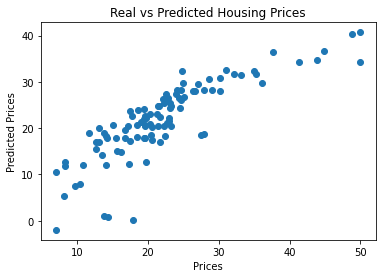

In [21]:
# plotting the y_test vs y_pred
plt.scatter(Y_test, y_test_predict)
plt.xlabel( "Prices")
plt.ylabel( "Predicted Prices")
plt.title( "Real vs Predicted Housing Prices")
plt.show()

Infernce: The above plot between Y_test and y_test_predict is not much scattered , hence the predicted model could be a good one